<a href="https://colab.research.google.com/github/ManjuRama/FinMath/blob/main/vasicek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SDE for vasicek model  

$dr(t) = k(θ − r(t))dt + σdW(t) $

here k, θ, σ > 0 and W is a Brownian motion under the risk-neutral measure

The short rate r(t), for each time t, can be negative with positive probability. This is a major drawback of the
Vasicek model. On the other hand, the short rate in the Vasicek model is mean
reverting, i.e., rates revert to a long-time level



In [3]:
def vasicek(r0, K, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                K * (theta - rates[i - 1, j]) * dt
                + sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

In [4]:
M = 100  # Number of paths for Monte Carlo
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.01875
K = 0.20
theta = 0.01
sigma = 0.012
t = np.linspace(0, T, N)

rates = vasicek(r0, K, theta, sigma, T, N, M)
rates.shape

(100, 100)

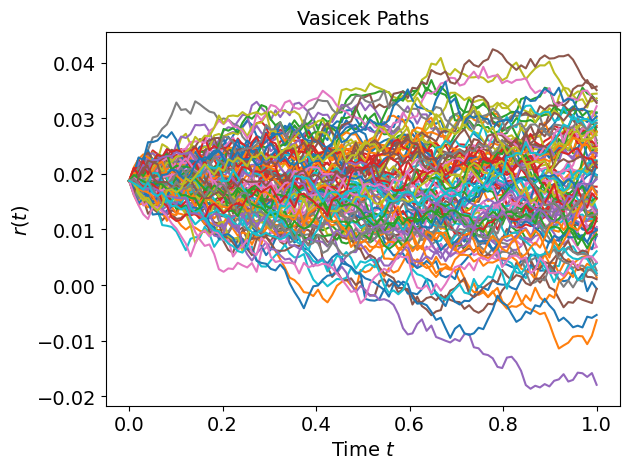

In [8]:
for j in range(M):
    plt.plot(t, rates[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("Vasicek Paths", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()